In [6]:
# -*- coding: utf-8 -*-
"""
Versión definitiva para el CSV de La Chancla (mayo.csv)
- Limpia encabezados, filas vacías y títulos de familia
- Convierte correctamente los números con comas
- Detecta valores negativos
"""
meses=['mayo.csv','junio.csv','julio.csv','agosto.csv','septiembre.csv']
import pandas as pd
for i in meses:
    # 1️⃣ Leer CSV con tabulador
    df = pd.read_csv(i, sep="\t", encoding="latin-1", engine="python")
    
    # 2️⃣ Quitar filas completamente vacías
    df = df.dropna(how="all")
    
    # 3️⃣ Quitar filas que son títulos de familia (sin 'Código' pero con texto en 'Descripción')
    df = df[~((df["Código"].isna()) & (df["Descripción"].notna()))]
    
    # 4️⃣ Quitar filas que no tienen ni código ni descripción
    df = df[df["Código"].notna() | df["Descripción"].notna()]
    
    # 5️⃣ Limpiar columnas numéricas
    def limpiar_numero(valor):
        if pd.isna(valor):
            return 0.0
        valor = str(valor).replace('.', '').replace(',', '.').replace('"', '').strip()
        try:
            return float(valor)
        except:
            return 0.0
    
    # 6️⃣ Columnas que contienen números
    columnas_numericas = [
        "Unidades",
        "Importe Total",
        "Importe Total  I.I.",
        "% Venta",
        "% Acumu.",
        "Beneficio B.I.",
        "% Ben."
    ]
    
    for col in columnas_numericas:
        if col in df.columns:
            df[col] = df[col].apply(limpiar_numero)
        else:
            print(f"⚠️ Columna no encontrada: {col}")
    
    # 7️⃣ Buscar negativos
    columnas_existentes = [c for c in columnas_numericas if c in df.columns]
    negativos = df[(df[columnas_existentes] < 0).any(axis=1)]
    
    # 8️⃣ Mostrar resultados
    print("\n=== FILAS CON VALORES NEGATIVOS DETECTADAS ===")
    if not negativos.empty:
        print(negativos[["Código", "Descripción"] + columnas_existentes])
        total_neg = negativos["Importe Total"].sum()
        print(f"\n🔻 Total negativo detectado: {total_neg:,.2f} €")
    else:
        print("✅ No se han detectado valores negativos.")
    
    # 9️⃣ Guardar negativos en archivo nuevo
    negativos.to_csv("lineas_negativas_ABC.csv", index=False, encoding="utf-8")
    print(f"\n{i}\n📁 Archivo 'lineas_negativas_ABC.csv' creado correctamente.")





=== FILAS CON VALORES NEGATIVOS DETECTADAS ===
    Código   Descripción  Unidades  Importe Total  Importe Total  I.I.  \
1        ç           NaN      49.0        -167.52              -184.27   
10  000011  NESTEA LIMÓN      80.0         163.64               180.00   

    % Venta  % Acumu.  Beneficio B.I.   % Ben.  
1    100.00     100.0         -167.52   100.00  
10     2.49      27.1        -5516.36 -3371.11  

🔻 Total negativo detectado: -3.88 €

mayo.csv
📁 Archivo 'lineas_negativas_ABC.csv' creado correctamente.

=== FILAS CON VALORES NEGATIVOS DETECTADAS ===
    Código   Descripción  Unidades  Importe Total  Importe Total  I.I.  \
1        ç           NaN      44.0        -152.58              -167.84   
11  000011  NESTEA LIMÓN      88.0         180.00               198.00   

    % Venta  % Acumu.  Beneficio B.I.   % Ben.  
1    100.00    100.00         -152.58   100.00  
11     2.13     28.88        -6068.00 -3371.11  

🔻 Total negativo detectado: 27.42 €

junio.csv
📁 Archivo 

C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\1939711335.py:33: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


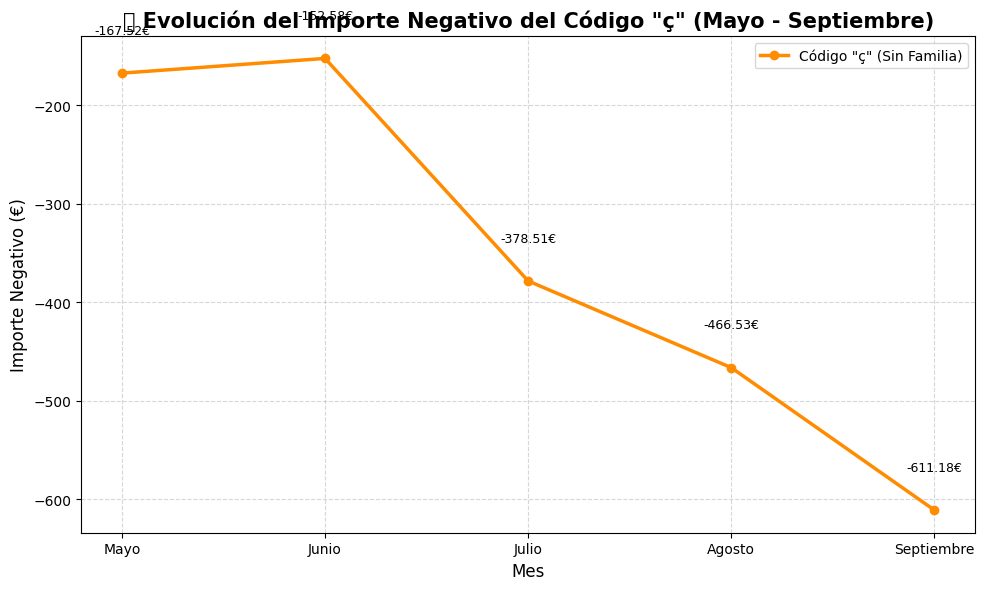

In [9]:
import matplotlib.pyplot as plt

# Datos del código "ç"
negativo_c = {
    'Mayo': -167.52,
    'Junio': -152.58,
    'Julio': -378.51,
    'Agosto': -466.53,
    'Septiembre': -611.18
}

# Crear gráfico
plt.figure(figsize=(10,6))
plt.plot(
    negativo_c.keys(),
    negativo_c.values(),
    marker='o',
    color='darkorange',
    linewidth=2.5,
    label='Código "ç" (Sin Familia)'
)

# Etiquetas encima de cada punto
for mes, valor in negativo_c.items():
    plt.text(mes, valor + 40, f"{valor:.2f}€", ha='center', color='black', fontsize=9)

# Decoración
plt.title('📉 Evolución del Importe Negativo del Código "ç" (Mayo - Septiembre)', fontsize=15, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Importe Negativo (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Mostrar
plt.show()



In [10]:
import pandas as pd
import glob

# 📂 1️⃣ Buscar automáticamente todos los archivos mensuales CSV
archivos = sorted(glob.glob("*.csv"))  # se asume que están en la misma carpeta

# 📊 2️⃣ Diccionario donde guardaremos el total facturado por mes
facturacion_mensual = {}

# 🧮 3️⃣ Función para limpiar números con comas y puntos
def to_float(x):
    try:
        x = str(x).replace('.', '').replace(',', '.').replace('"', '').strip()
        return float(x)
    except:
        return 0.0

# 🔁 4️⃣ Recorremos cada archivo y calculamos el total del "Importe Total"
for archivo in archivos:
    try:
        # Leer CSV con separador de tabulador
        df = pd.read_csv(archivo, sep='\t', encoding='latin-1', engine='python')

        # Normalizar encabezados
        df.columns = [c.strip() for c in df.columns]

        # Asegurar que la columna exista
        if "Importe Total" in df.columns:
            df["Importe Total"] = df["Importe Total"].apply(to_float)
            total_mes = df["Importe Total"].sum()
        else:
            total_mes = 0.0

        # Guardar el total con el nombre del mes (quitando .csv)
        mes = archivo.replace(".csv", "").capitalize()
        facturacion_mensual[mes] = total_mes

    except Exception as e:
        print(f"⚠️ Error procesando {archivo}: {e}")

# 📈 5️⃣ Mostrar resultados ordenados
print("\n=== TOTAL FACTURADO POR MES ===")
for mes, total in facturacion_mensual.items():
    print(f"{mes:<12} {total:,.2f} €")



=== TOTAL FACTURADO POR MES ===
Agosto       151,539.63 €
Julio        145,289.67 €
Junio        132,869.76 €
Ktlm01       1,023,051.50 €
Lineas_negativas_abc 0.00 €
Mayo         118,726.54 €
Septiembre   115,637.13 €


In [11]:
import pandas as pd

# Función para limpiar números con comas y puntos
def to_float(x):
    try:
        x = str(x).replace('.', '').replace(',', '.').replace('"', '').strip()
        return float(x)
    except:
        return 0.0

# Archivos mensuales
archivos = {
    'Mayo': 'mayo.csv',
    'Junio': 'junio.csv',
    'Julio': 'julio.csv',
    'Agosto': 'agosto.csv',
    'Septiembre': 'septiembre.csv'
}

# Diccionario para almacenar los totales facturados
totales = {}

for mes, archivo in archivos.items():
    df = pd.read_csv(archivo, sep='\t', encoding='latin-1', engine='python')
    df.columns = [c.strip() for c in df.columns]
    if 'Importe Total' in df.columns:
        df['Importe Total'] = df['Importe Total'].apply(to_float)
        total_mes = df['Importe Total'].sum()
        totales[mes] = total_mes

# Mostrar los resultados
print("\n=== TOTAL FACTURADO POR MES ===")
for mes, total in totales.items():
    print(f"{mes:<12} {total:,.2f} €")



=== TOTAL FACTURADO POR MES ===
Mayo         118,726.54 €
Junio        132,869.76 €
Julio        145,289.67 €
Agosto       151,539.63 €
Septiembre   115,637.13 €


C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\47432675.py:30: UserWarning: Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\sgcov\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


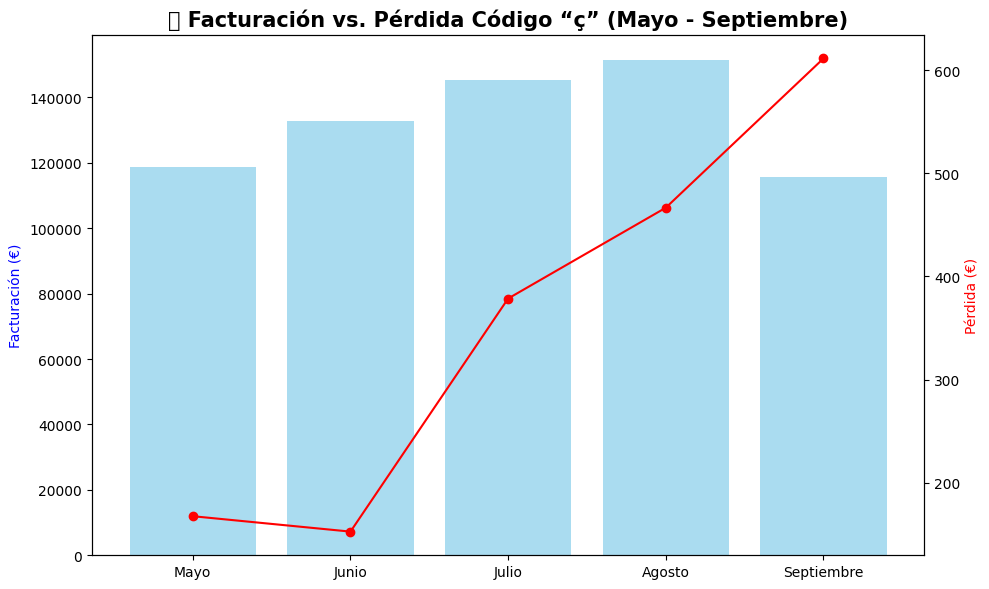

In [12]:
import matplotlib.pyplot as plt

# Negativos detectados del código “ç”
negativos_c = {
    'Mayo': -167.52,
    'Junio': -152.58,
    'Julio': -378.51,
    'Agosto': -466.53,
    'Septiembre': -611.18
}

# Gráfico combinado
meses = list(totales.keys())
facturacion = [totales[m] for m in meses]
negativos = [abs(negativos_c[m]) for m in meses]  # en positivo para comparación

fig, ax1 = plt.subplots(figsize=(10,6))

# Facturación (barras)
ax1.bar(meses, facturacion, color='skyblue', alpha=0.7, label='Facturación Total (€)')
ax1.set_ylabel('Facturación (€)', color='blue')

# Negativos (línea)
ax2 = ax1.twinx()
ax2.plot(meses, negativos, 'o-r', label='Pérdida Código "ç" (€)')
ax2.set_ylabel('Pérdida (€)', color='red')

# Título y formato
plt.title('💶 Facturación vs. Pérdida Código “ç” (Mayo - Septiembre)', fontsize=15, fontweight='bold')
fig.tight_layout()
plt.show()


C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\1784975898.py:38: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sgcov\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


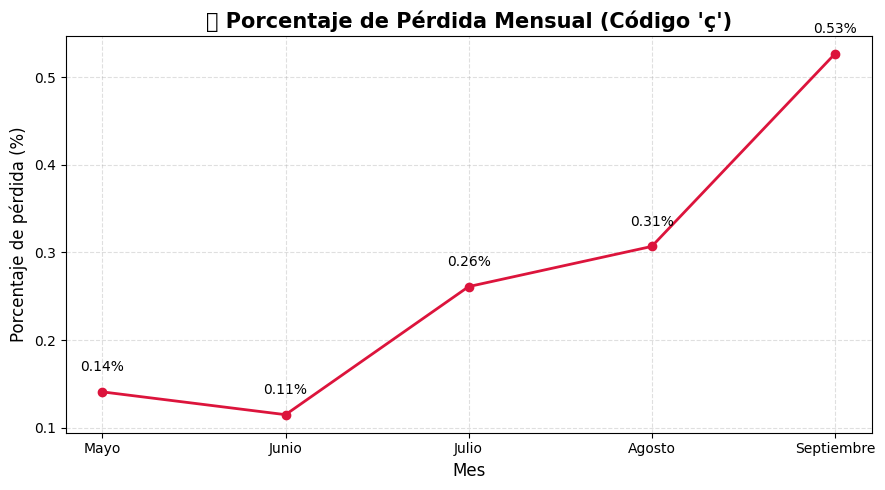

In [13]:
import matplotlib.pyplot as plt

# 🔹 Datos reales aproximados de tu gráfico anterior
facturacion = {
    'Mayo': 119000,
    'Junio': 133000,
    'Julio': 145000,
    'Agosto': 152000,
    'Septiembre': 116000
}

negativos_c = {
    'Mayo': -167.52,
    'Junio': -152.58,
    'Julio': -378.51,
    'Agosto': -466.53,
    'Septiembre': -611.18
}

# 🧮 Calcular porcentaje de pérdida
porcentajes = {mes: abs(negativos_c[mes]) / facturacion[mes] * 100 for mes in facturacion}

# 📊 Crear gráfico
meses = list(porcentajes.keys())
valores = list(porcentajes.values())

plt.figure(figsize=(9,5))
plt.plot(meses, valores, 'o-', color='crimson', linewidth=2)
plt.title("📉 Porcentaje de Pérdida Mensual (Código 'ç')", fontsize=15, fontweight='bold')
plt.ylabel("Porcentaje de pérdida (%)", fontsize=12)
plt.xlabel("Mes", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Etiquetas encima de los puntos
for i, v in enumerate(valores):
    plt.text(i, v + 0.02, f"{v:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\2924222217.py:33: UserWarning: Glyph 128182 (\N{BANKNOTE WITH EURO SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


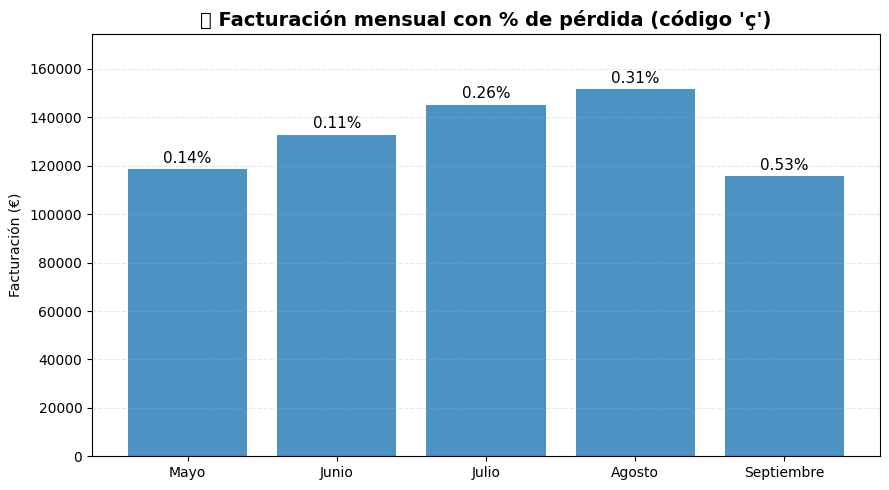

In [21]:
import matplotlib.pyplot as plt

# Diccionarios que ya tienes:
# totales = {'Mayo': ..., 'Junio': ..., 'Julio': ..., 'Agosto': ..., 'Septiembre': ...}
# negativos_c = {'Mayo': -167.52, 'Junio': -152.58, 'Julio': -378.51, 'Agosto': -466.53, 'Septiembre': -611.18}

meses = list(totales.keys())
facturacion = [totales[m] for m in meses]

# Calcula % de pérdida (código "ç")
porcentajes = [abs(negativos_c[m]) / totales[m] * 100 for m in meses]

plt.figure(figsize=(9,5))

# Barras de facturación
bars = plt.bar(meses, facturacion, alpha=0.8)

# Etiquetas: SOLO el % encima de cada barra
for i, (bar, p) in enumerate(zip(bars, porcentajes)):
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h * 1.01,                 # un pelín por encima
        f"{p:.2f}%",
        ha='center', va='bottom', fontsize=11
    )

# Estética
plt.title("💶 Facturación mensual con % de pérdida (código 'ç')", fontsize=14, fontweight='bold')
plt.ylabel("Facturación (€)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(facturacion) * 1.15)   # evita que el texto se pegue al borde
plt.tight_layout()

plt.show()


C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\801214828.py:70: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


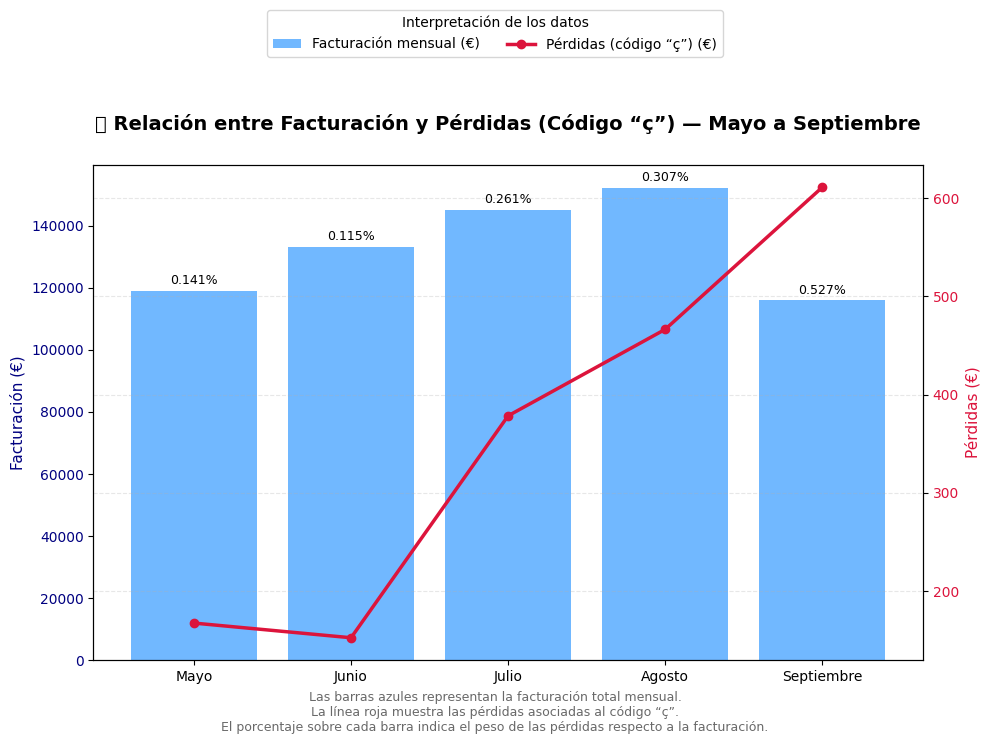

In [32]:
import matplotlib.pyplot as plt

# === Datos base ===
totales = {
    'Mayo': 119000,
    'Junio': 133000,
    'Julio': 145000,
    'Agosto': 152000,
    'Septiembre': 116000
}

negativos_c = {
    'Mayo': -167.52,
    'Junio': -152.58,
    'Julio': -378.51,
    'Agosto': -466.53,
    'Septiembre': -611.18
}

# === Calcular valores ===
meses = list(totales.keys())
facturacion = [totales[m] for m in meses]
negativos = [abs(negativos_c[m]) for m in meses]
porcentajes = [abs(negativos_c[m]) / totales[m] * 100 for m in meses]

# === Crear figura ===
fig, ax1 = plt.subplots(figsize=(10,6))

# --- Barras azules: facturación mensual ---
bars = ax1.bar(meses, facturacion, color='#4da6ff', alpha=0.8, label='Facturación mensual (€)')
ax1.set_ylabel('Facturación (€)', color='navy', fontsize=11)
ax1.tick_params(axis='y', labelcolor='navy')

# --- Línea roja: pérdidas del código “ç” ---
ax2 = ax1.twinx()
ax2.plot(meses, negativos, 'o-', color='crimson', linewidth=2.5, label='Pérdidas (código “ç”) (€)')
ax2.set_ylabel('Pérdidas (€)', color='crimson', fontsize=11)
ax2.tick_params(axis='y', labelcolor='crimson')

# --- Añadir % encima de cada barra ---
for bar, p in zip(bars, porcentajes):
    ax1.text(
        bar.get_x() + bar.get_width()/2, bar.get_height() * 1.01,
        f"{p:.3f}%",
        ha='center', va='bottom', fontsize=9, color='black'
    )

# === Estilo profesional ===
plt.title('📊 Relación entre Facturación y Pérdidas (Código “ç”) — Mayo a Septiembre',
          fontsize=14, fontweight='bold', pad=25)

# Cuadro explicativo (leyenda fusionada)
fig.legend(
    loc='upper center', ncol=2, frameon=True, fontsize=10,
    bbox_to_anchor=(0.5, 1.16),
    title='Interpretación de los datos',
    title_fontsize=10
)

# Texto aclaratorio
plt.figtext(
    0.5, -0.05,
    "Las barras azules representan la facturación total mensual.\n"
    "La línea roja muestra las pérdidas asociadas al código “ç”.\n"
    "El porcentaje sobre cada barra indica el peso de las pérdidas respecto a la facturación.",
    wrap=True, ha='center', fontsize=9, color='dimgray'
)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



In [40]:
import pandas as pd
import numpy as np

def _to_float(x):
    """
    Convierte '1.234,56' (con comas y miles) a float 1234.56.
    Si viene NaN o cadena vacía, devuelve 0.0
    """
    if pd.isna(x):
        return 0.0
    s = str(x).strip().replace('"','')
    if s == '' or s.lower() == 'nan':
        return 0.0
    # quita separador de miles '.' y cambia ',' por '.'
    s = s.replace('.', '').replace(',', '.')
    try:
        return float(s)
    except:
        return 0.0

def analizar_desayunos_un_mes(ruta_csv):
    """
    Lee un CSV exportado con familias (fila 'DESAYUNOS' como separador),
    normaliza las columnas, etiqueta la familia por forward-fill y
    devuelve:
      - detalle productos de DESAYUNOS (por Código y Descripción)
      - totales del mes (unidades e importe)
    """
    # 1) Leer todo sin encabezado para no romper por filas de familia
    df = pd.read_csv(ruta_csv, sep='\t', header=None, dtype=str, encoding='latin-1', engine='python')
    # Limpieza básica de espacios
    df = df.applymap(lambda v: v.strip() if isinstance(v, str) else v)

    # 2) La primera fila trae los nombres de columnas reales
    cols = df.iloc[0].tolist()
    df = df.iloc[1:].reset_index(drop=True)
    df.columns = cols

    # Asegurar columnas esperadas (algunas exportaciones traen doble espacio en "Importe Total  I.I.")
    # y "Importe Total" exacto.
    # Si faltan, las creamos vacías para evitar KeyError
    for nombre in ["Código", "Descripción", "Unidades", "Importe Total"]:
        if nombre not in df.columns:
            df[nombre] = np.nan

    # 3) Crear columna 'Familia' detectando filas de familia:
    # Patrón típico: 'Código' está vacío y 'Descripción' tiene el nombre de la familia
    es_familia = df["Código"].isna() & df["Descripción"].notna()
    df.loc[es_familia, "Familia"] = df.loc[es_familia, "Descripción"].str.upper()
    df["Familia"] = df["Familia"].ffill()

    # 4) Filtrar solo la familia DESAYUNOS y quedarnos con filas de producto (tienen 'Código')
    des = df[(df["Familia"] == "DESAYUNOS") & (df["Código"].notna())].copy()

    # 5) Convertir numéricos
    des["Unidades"] = des["Unidades"].apply(_to_float)
    des["Importe Total"] = des["Importe Total"].apply(_to_float)

    # 6) Agregar por producto (por si hay líneas repetidas)
    detalle = (des.groupby(["Código", "Descripción"], dropna=False)
                  .agg({"Unidades":"sum", "Importe Total":"sum"})
                  .reset_index()
                  .sort_values(["Importe Total","Unidades"], ascending=[False, False]))

    # 7) Totales del mes
    tot_unidades = float(detalle["Unidades"].sum())
    tot_importe = float(detalle["Importe Total"].sum())

    return detalle, {"Mes": ruta_csv, "Unidades": tot_unidades, "Importe (€)": tot_importe}

# ======== USO ========
# Pásale aquí tus ficheros reales
archivos = ["mayo.csv", "junio.csv", "julio.csv", "agosto.csv", "septiembre.csv"]

resumen_mensual = []
for f in archivos:
    try:
        detalle, totales = analizar_desayunos_un_mes(f)
        print(f"\n📊 {f.upper()}")
        print(detalle.to_string(index=False))
        print(f"\n🔹 Total unidades vendidas (DESAYUNOS): {totales['Unidades']:.0f}")
        print(f"🔹 Total importe (DESAYUNOS) (€): {totales['Importe (€)']:.2f}")
        resumen_mensual.append(totales)
    except Exception as e:
        print(f"\n⚠️ Error procesando {f}: {e}")

# DataFrame con el histórico por mes (para comparar meses entre sí)
if resumen_mensual:
    hist = pd.DataFrame(resumen_mensual)
    # Ordena por el orden de 'archivos' (meses)
    hist["Mes"] = pd.Categorical(hist["Mes"], categories=archivos, ordered=True)
    hist = hist.sort_values("Mes").reset_index(drop=True)
    print("\n====== RESUMEN DESAYUNOS POR MES ======")
    print(hist.to_string(index=False))



📊 MAYO.CSV
Código      Descripción  Unidades  Importe Total
001488      MULTICEREAL     801.0        1153.45
001487          RUSTICO     695.0         940.91
001590        UNIVERSAL     216.0         785.45
001495    JAMÓN IBÉRICO     335.0         759.09
001486        CROISSANT     275.0         534.00
001505           ACEITE    1162.0         525.91
001489          MOLLETE     376.0         511.36
001504         AGUACATE     555.0         447.55
001787    BOWL DE FRUTA      99.0         423.00
001507  EMULSION TOMATE     874.0         395.45
001500     YORK + QUESO     293.0         316.36
001518     TORTILLA  2H     139.0         306.82
001463      BOWL YOGURT     142.0         250.91
001517      REVUELTO 2H     116.0         247.73
001807    JAMÓN SERRANO     257.0         233.64
001508      MANTEQUILLA     445.0         196.36
001499 HUEVO PLANCHA 1H     201.0         180.00
001806         INTEGRAL     164.0         178.91
001740       PAVO+QUESO     135.0         158.36
001739  

C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\1522851544.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda v: v.strip() if isinstance(v, str) else v)
C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\1522851544.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda v: v.strip() if isinstance(v, str) else v)
C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\1522851544.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda v: v.strip() if isinstance(v, str) else v)
C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\1522851544.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda v: v.strip() if isinstance(v, str) else v)
C:\Users\sgcov\AppData\Local\Temp\ipykernel_11236\1522851544.py:32: FutureWarning: DataFrame.applymap has been deprecated. U

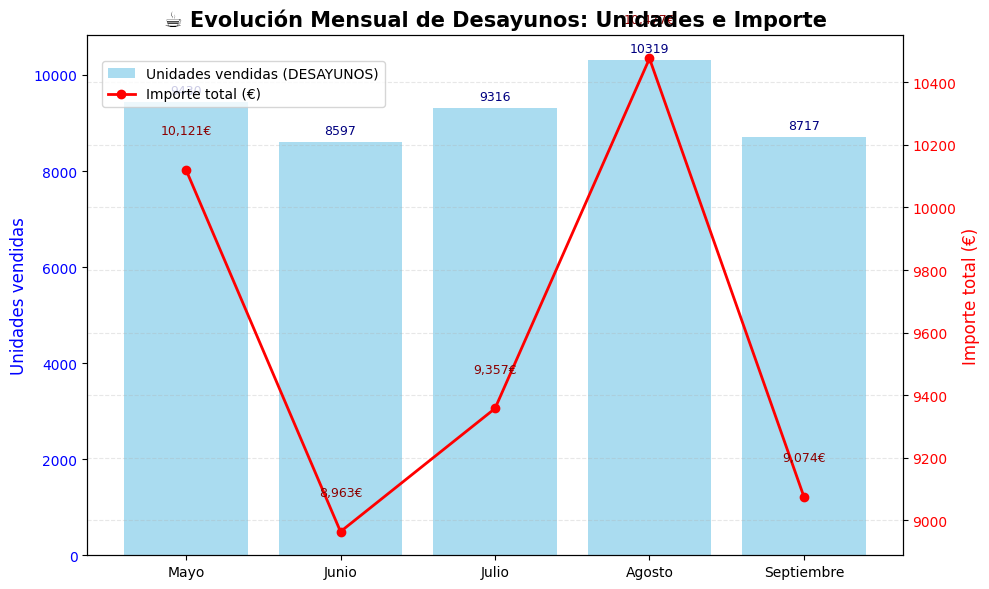

In [41]:
import matplotlib.pyplot as plt

# --- Aseguramos que existen los datos ---
if 'hist' not in locals():
    raise ValueError("Primero ejecuta el código anterior para generar el DataFrame 'hist'.")

# --- Configurar datos ---
meses = [m.replace('.csv','').capitalize() for m in hist["Mes"]]
unidades = hist["Unidades"]
importe = hist["Importe (€)"]

# --- Crear figura ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras azules: unidades vendidas
ax1.bar(meses, unidades, color='skyblue', alpha=0.7, label='Unidades vendidas (DESAYUNOS)')
ax1.set_ylabel("Unidades vendidas", color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Línea roja: importe total (€)
ax2 = ax1.twinx()
ax2.plot(meses, importe, 'o-r', linewidth=2, label='Importe total (€)')
ax2.set_ylabel("Importe total (€)", color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# --- Etiquetas de valores sobre las barras y puntos ---
for i, v in enumerate(unidades):
    ax1.text(i, v + max(unidades)*0.01, f"{int(v)}", ha='center', va='bottom', fontsize=9, color='navy')

for i, v in enumerate(importe):
    ax2.text(i, v + max(importe)*0.01, f"{v:,.0f}€", ha='center', va='bottom', fontsize=9, color='darkred')

# --- Título y formato ---
plt.title("☕ Evolución Mensual de Desayunos: Unidades e Importe", fontsize=15, fontweight='bold')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


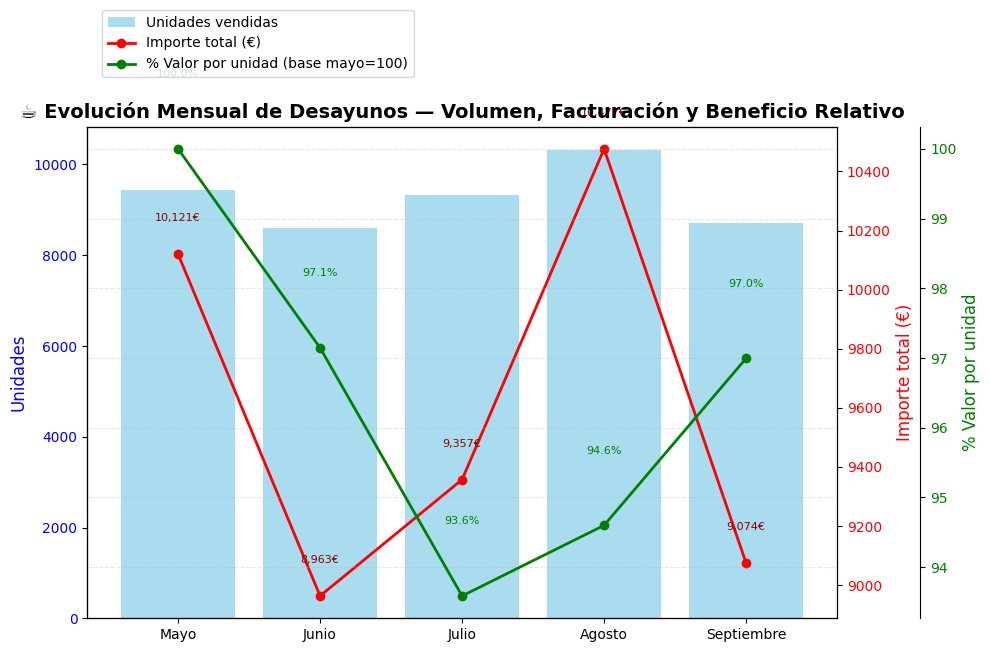

In [47]:
import matplotlib.pyplot as plt

# --- Datos ---
meses = [m.replace('.csv','').capitalize() for m in hist["Mes"]]
unidades = hist["Unidades"]
importe = hist["Importe (€)"]

# --- Cálculo del ratio de beneficio o valor medio por unidad ---
precio_medio = (importe / unidades).fillna(0)
# Lo pasamos a índice base 100 para compararlo como % (si quieres verlo así)
base = precio_medio.iloc[0]
porcentaje_relativo = (precio_medio / base) * 100

# --- Crear figura ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras azules = unidades
ax1.bar(meses, unidades, color='skyblue', alpha=0.7, label='Unidades vendidas')
ax1.set_ylabel("Unidades", color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Línea roja = importe total
ax2 = ax1.twinx()
ax2.plot(meses, importe, 'o-r', linewidth=2, label='Importe total (€)')
ax2.set_ylabel("Importe total (€)", color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Línea verde = % de beneficio relativo (segundo eje derecho)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # desplaza el tercer eje
ax3.plot(meses, porcentaje_relativo, 'o-g', linewidth=2, label='% Valor por unidad (base mayo=100)')
ax3.set_ylabel("% Valor por unidad", color='green', fontsize=12)
ax3.tick_params(axis='y', labelcolor='green')

# --- Etiquetas encima de cada línea ---
for i, v in enumerate(importe):
    ax2.text(i, v + max(importe)*0.01, f"{v:,.0f}€", ha='center', va='bottom', fontsize=8, color='darkred')

for i, v in enumerate(porcentaje_relativo):
    ax3.text(i, v + max(porcentaje_relativo)*0.01, f"{v:.1f}%", ha='center', va='bottom', fontsize=8, color='green')

# --- Título y formato ---
plt.title("☕ Evolución Mensual de Desayunos — Volumen, Facturación y Beneficio Relativo", fontsize=14, fontweight='bold')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 1.09))
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()
